In [1]:
import tensorflow as tf

In [45]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

In [46]:
DATA_FILE = 'stanford-tensorflow-tutorials-master/data/fire_theft.xls'

# Phase 1: Assemble the graph
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

In [47]:
# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
# Both have the type float32
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [48]:
# Step 3: create weight and bias, initialized to 0
# name your variables w and b
w = tf.Variable(0, dtype=tf.float32, name='weights')
b = tf.Variable(0, dtype=tf.float32, name='bias')

In [49]:
# Step 4: predict Y (number of theft) from the number of fire
# name your variable Y_predicted
Y_predicted = X*weights + bias

In [50]:
# Step 5: use the square error as the loss function
# name your variable loss
loss = tf.square(Y - Y_predicted, name='loss')

In [51]:
# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [52]:
# Phase 2: Train our model
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    # TO - DO	
    
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter('graphs/linear_reg', sess.graph)

    # Step 8: train the model
    for i in range(50): # run 100 epochs
        total_loss = 0
        for x, y in data:
            # Session runs optimizer to minimize loss and fetch the value of loss. Name the received value as l
            # TO DO: write sess.run()
            
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})

            total_loss += l
        
        print("Epoch {0}: {1}".format(i, total_loss/n_samples))
        writer.close()
        # Step 9: output the values of w and b
        w, b = sess.run([weights, bias]) 

Epoch 0: 2069.6319333978354
Epoch 1: 2117.0123581953535
Epoch 2: 2092.302723001866
Epoch 3: 2068.5080461938464
Epoch 4: 2045.591184088162
Epoch 5: 2023.5146448101316
Epoch 6: 2002.2447619835536
Epoch 7: 1981.748338803649
Epoch 8: 1961.9944411260742
Epoch 9: 1942.9520116143283
Epoch 10: 1924.5930823644712
Epoch 11: 1906.8898800636332
Epoch 12: 1889.8164505837929
Epoch 13: 1873.347133841543
Epoch 14: 1857.4588400604468
Epoch 15: 1842.1278742424079
Epoch 16: 1827.332495119955
Epoch 17: 1813.0520579712022
Epoch 18: 1799.2660847636982
Epoch 19: 1785.9562132299961
Epoch 20: 1773.1024853109072
Epoch 21: 1760.689129482884
Epoch 22: 1748.6984157081515
Epoch 23: 1737.1138680398553
Epoch 24: 1725.920873066732
Epoch 25: 1715.1046249579008
Epoch 26: 1704.6500954309377
Epoch 27: 1694.5447134910141
Epoch 28: 1684.7746311347667
Epoch 29: 1675.328450968245
Epoch 30: 1666.1935385839038
Epoch 31: 1657.3584002084322
Epoch 32: 1648.8122658529207
Epoch 33: 1640.5440742547091
Epoch 34: 1632.5446836102221
Epo

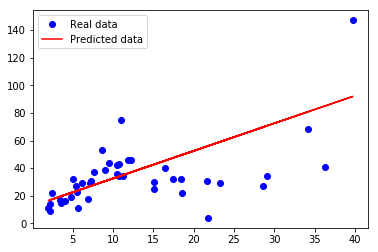

In [53]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()

Epoch 0: 2069.6319333978354
Epoch 1: 2117.0123581953535
Epoch 2: 2092.302723001866
Epoch 3: 2068.5080461938464
Epoch 4: 2045.591184088162
Epoch 5: 2023.5146448101316
Epoch 6: 2002.2447619835536
Epoch 7: 1981.748338803649
Epoch 8: 1961.9944411260742
Epoch 9: 1942.9520116143283
Epoch 10: 1924.5930823644712
Epoch 11: 1906.8898800636332
Epoch 12: 1889.8164505837929
Epoch 13: 1873.347133841543
Epoch 14: 1857.4588400604468
Epoch 15: 1842.1278742424079
Epoch 16: 1827.332495119955
Epoch 17: 1813.0520579712022
Epoch 18: 1799.2660847636982
Epoch 19: 1785.9562132299961
Epoch 20: 1773.1024853109072
Epoch 21: 1760.689129482884
Epoch 22: 1748.6984157081515
Epoch 23: 1737.1138680398553
Epoch 24: 1725.920873066732
Epoch 25: 1715.1046249579008
Epoch 26: 1704.6500954309377
Epoch 27: 1694.5447134910141
Epoch 28: 1684.7746311347667
Epoch 29: 1675.328450968245
Epoch 30: 1666.1935385839038
Epoch 31: 1657.3584002084322
Epoch 32: 1648.8122658529207
Epoch 33: 1640.5440742547091
Epoch 34: 1632.5446836102221
Epo

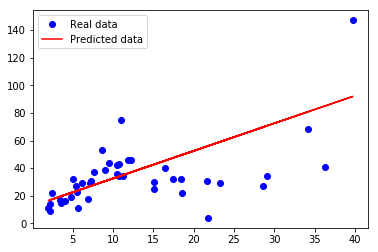

In [55]:
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * w + b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
	
	# Step 8: train the model
	for i in range(50): # train the model 100 epochs
		total_loss = 0
		for x, y in data:
			# Session runs train_op and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
	writer.close() 
	
	# Step 9: output the values of w and b
	w, b = sess.run([w, b]) 

# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()

In [56]:
def huber_loss(labels, predictions, delta=1.0):
    diff = tf.abs(labels-predictions)
    return tf.cond(diff <= delta, 0.5*tf.square(labels-predictions), delta*tf.abs(labels-predictions)-0.5*tf.square(delta))

In [57]:
from tensorflow.examples.tutorials.mnist import input_data
import time

In [ ]:


# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
# Both have the type float32


# Step 3: create weight and bias, initialized to 0
# name your variables w and b


# Step 4: predict Y (number of theft) from the number of fire
# name your variable Y_predicted


# Step 5: use the square error as the loss function
# name your variable loss


# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
 

	


In [73]:
learning_rate = 0.1

In [61]:
# Define paramaters for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 10

# Step 1: Read in data
# using TF Learn's built in function to load MNIST data to the folder data/mnist
mnist = input_data.read_data_sets('stanford-tensorflow-tutorials-master/data/mnist', one_hot=True) 

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting stanford-tensorflow-tutorials-master/data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting stanford-tensorflow-tutorials-master/data/mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting stanford-tensorflow-tutorials-master/data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting stanford-tensorflow-tutorials-master/data/mnist/t10k-labels-idx1-ubyte.gz


In [63]:
# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# Features are of the type float, and labels are of the type int
X = tf.placeholder(tf.float32, [batch_size, 784], name='image')
Y = tf.placeholder(tf.int32, [batch_size, 10], name='label')

In [64]:
# Step 3: create weights and bias
# weights and biases are initialized to 0
# shape of w depends on the dimension of X and Y so that Y = X * w + b
# shape of b depends on Y
w = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.01), name='weights')
b = tf.Variable(tf.zeros([1, 10]), name='bias')

In [66]:
logits = tf.matmul(X, w) + b

In [68]:
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y, name='loss')
loss = tf.reduce_mean(entropy)

In [69]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

In [72]:
with tf.Session() as sess:
    start_time = time.time()
    sess.run(tf.global_variables_initializer())	
    n_batches = int(mnist.train.num_examples/batch_size)
    for i in range(n_epochs): # train the model n_epochs times
        total_loss = 0

        for _ in range(n_batches):
            X_batch, Y_batch = mnist.train.next_batch(batch_size)
            # TO-DO: run optimizer + fetch loss_batch
            # 
            # 
            _, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y: Y_batch})
            total_loss += loss_batch
        print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

    print('Total time: {0} seconds'.format(time.time() - start_time))

    print('Optimization Finished!') # should be around 0.35 after 25 epochs

    # test the model
    preds = tf.nn.softmax(logits)
    correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32)) # need numpy.count_nonzero(boolarr) :(
    
    n_batches = int(mnist.test.num_examples/batch_size)
    total_correct_preds = 0
    
    for i in range(n_batches):
        X_batch, Y_batch = mnist.test.next_batch(batch_size)
        accuracy_batch = sess.run([accuracy], feed_dict={X: X_batch, Y:Y_batch}) 
        total_correct_preds += accuracy_batch	
    
    print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))

Average loss epoch 0: 0.3676006865181845
Average loss epoch 1: 0.29522584151207426
Average loss epoch 2: 0.28241826946432497
Average loss epoch 3: 0.27565868082510564
Average loss epoch 4: 0.27368535537333477
Average loss epoch 5: 0.27451216328741507
Average loss epoch 6: 0.2696948651319895
Average loss epoch 7: 0.2699968020468603
Average loss epoch 8: 0.2658338617611598
Average loss epoch 9: 0.26700960452253725
Total time: 4.523741006851196 seconds
Optimization Finished!


TypeError: unsupported operand type(s) for +=: 'int' and 'list'

In [74]:










# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
# to get the probability distribution of possible label of the image
# DO NOT DO SOFTMAX HERE


# Step 5: define loss function
# use cross entropy loss of the real labels with the softmax of logits
# use the method:
# tf.nn.softmax_cross_entropy_with_logits(logits, Y)
# then use tf.reduce_mean to get the mean loss of the batch


# Step 6: define training op
# using gradient descent to minimize loss


with tf.Session() as sess:
	start_time = time.time()
	sess.run(tf.global_variables_initializer())	
	n_batches = int(mnist.train.num_examples/batch_size)
	for i in range(n_epochs): # train the model n_epochs times
		total_loss = 0

		for _ in range(n_batches):
			X_batch, Y_batch = mnist.train.next_batch(batch_size)
			# TO-DO: run optimizer + fetch loss_batch
			# 
			# 
			total_loss += loss_batch
		print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

	print('Total time: {0} seconds'.format(time.time() - start_time))

	print('Optimization Finished!') # should be around 0.35 after 25 epochs

	# test the model
	preds = tf.nn.softmax(logits)
	correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y, 1))
	accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32)) # need numpy.count_nonzero(boolarr) :(
	
	n_batches = int(mnist.test.num_examples/batch_size)
	total_correct_preds = 0
	
	for i in range(n_batches):
		X_batch, Y_batch = mnist.test.next_batch(batch_size)
		accuracy_batch = sess.run([accuracy], feed_dict={X: X_batch, Y:Y_batch}) 
		total_correct_preds += accuracy_batch	
	
	print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))


Average loss epoch 0: 0.2860613763332367
Average loss epoch 1: 0.2860613763332367
Average loss epoch 2: 0.2860613763332367
Average loss epoch 3: 0.2860613763332367
Average loss epoch 4: 0.2860613763332367
Average loss epoch 5: 0.2860613763332367
Average loss epoch 6: 0.2860613763332367
Average loss epoch 7: 0.2860613763332367
Average loss epoch 8: 0.2860613763332367
Average loss epoch 9: 0.2860613763332367
Total time: 1.337428092956543 seconds
Optimization Finished!


TypeError: unsupported operand type(s) for +=: 'int' and 'list'

In [1]:
#start linear classification again

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd
DATA_FILE = "stanford-tensorflow-tutorials-master/data/fire_theft.xls"
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

In [4]:
data.shape

(42, 2)

In [31]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')
w = tf.Variable(0, dtype=tf.float32, name='weights')
b = tf.Variable(0, dtype=tf.float32, name='bias')
Y_predicted = X*w + b
loss = tf.square(Y - Y_predicted, name='loss')
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        total_loss = 0
        for x, y in data:
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += l
        if (i % 100 == 0):
            print("loss at epoch", str(i), str(total_loss))
    w_value, b_value = sess.run([w, b])

loss at epoch 0 86924.5412027
loss at epoch 100 59304.7590102
loss at epoch 200 57758.6628354
loss at epoch 300 57656.430099
loss at epoch 400 57649.7688064
loss at epoch 500 57649.429675
loss at epoch 600 57649.429675
loss at epoch 700 57649.429675
loss at epoch 800 57649.429675
loss at epoch 900 57649.429675


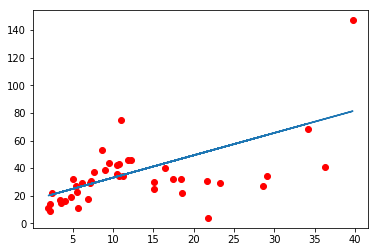

In [32]:
plt.plot(data[:, 0], data[:, 1], 'ro')
plt.plot(data[:, 0], w_value * data[:, 0] + b_value)
plt.show()

In [42]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')
w = tf.Variable(0, dtype=tf.float32, name='weights_1')
u = tf.Variable(0, dtype=tf.float32, name='weights_2')
b = tf.Variable(0, dtype=tf.float32, name='bias')
Y_predicted = X*X*w + X*u + b
loss = tf.square(Y - Y_predicted, name='loss')
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000000001).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        total_loss = 0
        for x, y in data:
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += l
        if (i % 1000 == 0):
            print("loss at epoch", str(i), str(total_loss))
    w_value, u_value, b_value = sess.run([w, u, b])

loss at epoch 0 68864.5415659
loss at epoch 1000 30939.3394843
loss at epoch 2000 30865.611588
loss at epoch 3000 30792.3089936
loss at epoch 4000 30719.4565606
loss at epoch 5000 30647.055607
loss at epoch 6000 30575.1032064
loss at epoch 7000 30503.5660073
loss at epoch 8000 30432.4161825
loss at epoch 9000 30361.6672579


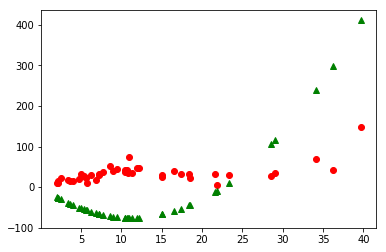

In [37]:
plt.plot(data[:, 0], data[:, 1], 'ro')
plt.plot(data[:, 0], w_value * data[:, 0] * data[:, 0] + u_value*data[:, 0] + b_value, 'g^')
plt.show()

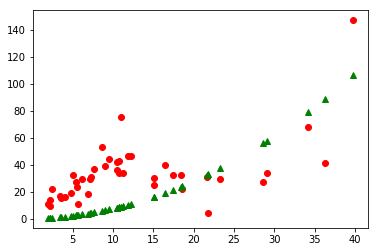

In [39]:
plt.plot(data[:, 0], data[:, 1], 'ro')
plt.plot(data[:, 0], w_value * data[:, 0] * data[:, 0] + u_value*data[:, 0] + b_value, 'g^')
plt.show()

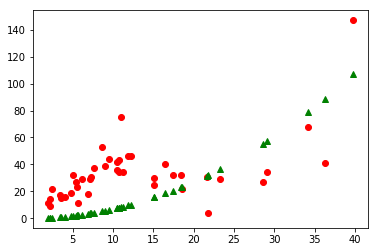

In [41]:
plt.plot(data[:, 0], data[:, 1], 'ro')
plt.plot(data[:, 0], w_value * data[:, 0] * data[:, 0] + u_value*data[:, 0] + b_value, 'g^')
plt.show()

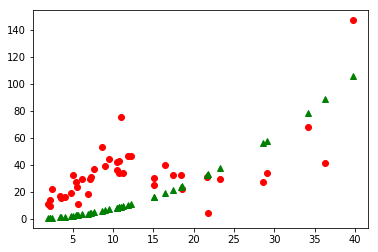

In [43]:
plt.plot(data[:, 0], data[:, 1], 'ro')
plt.plot(data[:, 0], w_value * data[:, 0] * data[:, 0] + u_value*data[:, 0] + b_value, 'g^')
plt.show()

In [ ]:
# use huber loss

In [49]:
def f1(labels, predictions):
    return 0.5*tf.square(labels-predictions)

def f2(labels, predictions, delta):
    return delta*tf.abs(labels-predictions)-0.5*tf.square(delta)
    
def huber_loss(labels, predictions, delta=1.0):
    diff = tf.abs(labels-predictions)
    return tf.cond(diff <= delta, lambda: f1(labels, predictions), lambda: f2(labels, predictions, delta))

In [74]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')
w = tf.Variable(0, dtype=tf.float32, name='weights_1')
u = tf.Variable(0, dtype=tf.float32, name='weights_2')
b = tf.Variable(0, dtype=tf.float32, name='bias')
Y_predicted = X*X*w + X*u + b
loss = huber_loss(Y, Y_predicted)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0000001).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        total_loss = 0
        for x, y in data:
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})
            total_loss += l
        if (i % 100 == 0):
            print("loss at epoch", str(i), str(total_loss))
    w_value, u_value, b_value = sess.run([w, u, b])

loss at epoch 0 1387.78677273
loss at epoch 100 971.313633353
loss at epoch 200 968.735862404
loss at epoch 300 968.223253436
loss at epoch 400 967.90155229
loss at epoch 500 967.598080654
loss at epoch 600 967.296445509
loss at epoch 700 966.994951076
loss at epoch 800 966.693504444
loss at epoch 900 966.391924784


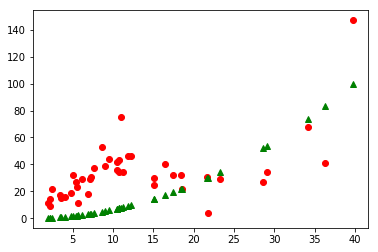

In [75]:
plt.plot(data[:, 0], data[:, 1], 'ro')
plt.plot(data[:, 0], w_value * data[:, 0] * data[:, 0] + u_value*data[:, 0] + b_value, 'g^')
plt.show()

In [51]:
#MNIST data

In [52]:
from tensorflow.examples.tutorials.mnist import input_data
MNIST = input_data.read_data_sets("stanford-tensorflow-tutorials-master/data/mnist", one_hot=True)

Extracting stanford-tensorflow-tutorials-master/data/mnist/train-images-idx3-ubyte.gz
Extracting stanford-tensorflow-tutorials-master/data/mnist/train-labels-idx1-ubyte.gz
Extracting stanford-tensorflow-tutorials-master/data/mnist/t10k-images-idx3-ubyte.gz
Extracting stanford-tensorflow-tutorials-master/data/mnist/t10k-labels-idx1-ubyte.gz


In [60]:
MNIST.train.num_examples

55000

In [63]:
MNIST.train.images[0].shape

(784,)

In [64]:
MNIST.train.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [59]:
MNIST.train.labels.shape

(55000, 10)

In [65]:
MNIST.train.labels[:10]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [85]:
tf.reset_default_graph()
batch_size = 128
X = tf.placeholder(tf.float32, shape=[batch_size, 784], name='X')
Y = tf.placeholder(tf.float32, shape=[batch_size, 10], name='Y')
W = tf.Variable(tf.random_normal(shape=[784, 10], stddev=0.001), name='weights')
b = tf.Variable(tf.zeros([1, 10]), name='bias')
Y_predicted = tf.add(tf.matmul(X, W), b)
entropy = tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=Y_predicted)
loss = tf.reduce_mean(entropy, name='loss')
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
with tf.Session() as sess:
    n_batches = int(MNIST.train.num_examples / batch_size)
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        total_loss = 0
        for _ in range(n_batches):
            X_batch, Y_batch = MNIST.train.next_batch(batch_size)
            _, l = sess.run([optimizer, loss], feed_dict={X: X_batch, Y: Y_batch})
            total_loss += l
        if (i % 100 == 0):
            print("loss at epoch", str(i), str(total_loss))
    W_value, b_value = sess.run([W, b])
    
    
    
    # test the model
    n_batches = int(MNIST.test.num_examples/batch_size)
    total_correct_preds = 0
    for i in range(n_batches):
        X_batch, Y_batch = MNIST.test.next_batch(batch_size)
        _, loss_batch, logits_batch = sess.run([optimizer, loss, Y_predicted], feed_dict={X: X_batch, Y:Y_batch})
        preds = tf.nn.softmax(logits_batch)
        correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
        accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32)) # similar to numpy.count_nonzero(boolarray) :(
        total_correct_preds += sess.run(accuracy)
    print("Accuracy {0}".format(total_correct_preds/MNIST.test.num_examples))

loss at epoch 0 900.438892484
loss at epoch 100 175.068133831
loss at epoch 200 152.899916947
loss at epoch 300 144.115186408
loss at epoch 400 137.699268758
loss at epoch 500 135.221864879
loss at epoch 600 131.102414325
loss at epoch 700 127.269550927
loss at epoch 800 127.931854382
loss at epoch 900 125.459299825
Accuracy 0.9191
